In [24]:
from os import listdir
from os.path import isdir, join
import librosa
import random
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features

In [25]:
# Dataset path and view possible targets

dataset_path = 'C:/Users/USER/Downloads/Compressed/speech_commands_v0.02'
for name in listdir(dataset_path):
    if isdir(join(dataset_path, name)):
        print(name)

backward
bed
bird
cat
dog
down
eight
five
follow
forward
four
go
happy
house
learn
left
marvin
nine
no
off
on
one
right
seven
sheila
six
stop
three
tree
two
up
visual
wow
yes
zero
_background_noise_


In [26]:
# Create an all targets list

all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero', '_background_noise_']


In [27]:
commands = [all_targets[i] for i in [0,9,15,19,20,22,26,-1]]
commands

['backward',
 'forward',
 'left',
 'off',
 'on',
 'right',
 'stop',
 '_background_noise_']

In [28]:
# See how many files are in each

num_samples = 0
for cmd in commands:
    print(len(listdir(join(dataset_path, cmd))))
    num_samples += len(listdir(join(dataset_path, cmd)))
print('Total samples:', num_samples)

1664
1557
3801
3745
3845
3778
3872
402
Total samples: 22664


In [29]:
#Setting parameters for rest of the script :::
target_list = commands

#Collection of features - Mertices, that resemble images that will store into a npz file
feature_sets_file = 'commands_mfcc_sets.npz'

perc_keep_samples = 1.0
val_ratio = 0.1
test_ratio = 0.1

# 'wav' files are recorded with 16kHz sampling rate && model runs faster at a lower sampling rate
sample_rate = 8000

# no. of mel frequency cepstral coefficients
num_mfcc = 16

# length of mfccs
len_mfcc = 16

In [30]:
#Create a list of all filenames with their full path, this will allow us to load each one and extract the features automatically
# 'y' array holds the ground truth or actual values
filenames = []
y = []
for index, target in enumerate(target_list):
    print(join(dataset_path, target))
    filenames.append(listdir(join(dataset_path, target)))
    y.append(np.ones(len(filenames[index]))*index)

C:/Users/USER/Downloads/Compressed/speech_commands_v0.02\backward
C:/Users/USER/Downloads/Compressed/speech_commands_v0.02\forward
C:/Users/USER/Downloads/Compressed/speech_commands_v0.02\left
C:/Users/USER/Downloads/Compressed/speech_commands_v0.02\off
C:/Users/USER/Downloads/Compressed/speech_commands_v0.02\on
C:/Users/USER/Downloads/Compressed/speech_commands_v0.02\right
C:/Users/USER/Downloads/Compressed/speech_commands_v0.02\stop
C:/Users/USER/Downloads/Compressed/speech_commands_v0.02\_background_noise_


In [31]:
# 'y' is a collection of arrays and each array is simply the number we assigned to the target word.
print(y)
for item in y:
    print(len(item))

[array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]), array([2., 2., 2., ..., 2., 2., 2.]), array([3., 3., 3., ..., 3., 3., 3.]), array([4., 4., 4., ..., 4., 4., 4.]), array([5., 5., 5., ..., 5., 5., 5.]), array([6., 6., 6., ..., 6., 6., 6.]), array([7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,

In [32]:
# Flatten filename and y vectors

filenames = [item for sublist in filenames for item in sublist]
y = [item for sublist in y for item in sublist]

In [33]:
filenames

['0165e0e8_nohash_0.wav',
 '017c4098_nohash_0.wav',
 '017c4098_nohash_1.wav',
 '017c4098_nohash_2.wav',
 '017c4098_nohash_3.wav',
 '017c4098_nohash_4.wav',
 '02ade946_nohash_0.wav',
 '02ade946_nohash_1.wav',
 '02ade946_nohash_2.wav',
 '02ade946_nohash_3.wav',
 '02ade946_nohash_4.wav',
 '03401e93_nohash_0.wav',
 '03401e93_nohash_1.wav',
 '042a8dde_nohash_0.wav',
 '042a8dde_nohash_1.wav',
 '042a8dde_nohash_2.wav',
 '042a8dde_nohash_3.wav',
 '050170cb_nohash_0.wav',
 '050170cb_nohash_1.wav',
 '050170cb_nohash_2.wav',
 '050170cb_nohash_3.wav',
 '050170cb_nohash_4.wav',
 '0585b66d_nohash_0.wav',
 '0585b66d_nohash_1.wav',
 '0585b66d_nohash_2.wav',
 '0585b66d_nohash_3.wav',
 '0585b66d_nohash_4.wav',
 '067f61e2_nohash_0.wav',
 '067f61e2_nohash_1.wav',
 '067f61e2_nohash_2.wav',
 '067f61e2_nohash_3.wav',
 '067f61e2_nohash_4.wav',
 '06f6c194_nohash_0.wav',
 '06f6c194_nohash_1.wav',
 '06f6c194_nohash_2.wav',
 '06f6c194_nohash_3.wav',
 '06f6c194_nohash_4.wav',
 '08ab231c_nohash_0.wav',
 '08ab231c_n

In [34]:
# Associate filenames with true output and shuffle

filenames_y = list(zip(filenames, y))
random.shuffle(filenames_y)
filenames, y = zip(*filenames_y)

In [35]:
filenames_y

[('5c39594f_nohash_2.wav', 4.0),
 ('cd85758f_nohash_1.wav', 6.0),
 ('6166ae21_nohash_0.wav', 5.0),
 ('running_tap_20.wav', 7.0),
 ('78884794_nohash_0.wav', 3.0),
 ('9331d34b_nohash_0.wav', 1.0),
 ('1887fe04_nohash_0.wav', 5.0),
 ('3cc595de_nohash_2.wav', 3.0),
 ('6904f0cb_nohash_0.wav', 6.0),
 ('9b027ecf_nohash_1.wav', 5.0),
 ('7f9eb952_nohash_4.wav', 6.0),
 ('5f9cd2eb_nohash_0.wav', 4.0),
 ('e71a9381_nohash_1.wav', 6.0),
 ('0e17f595_nohash_0.wav', 4.0),
 ('89947bd7_nohash_0.wav', 2.0),
 ('5170b77f_nohash_0.wav', 5.0),
 ('4e02d62d_nohash_0.wav', 3.0),
 ('6fb3d5a7_nohash_4.wav', 5.0),
 ('42a99aec_nohash_4.wav', 5.0),
 ('82e7204d_nohash_1.wav', 6.0),
 ('4a294341_nohash_2.wav', 2.0),
 ('18ffa72d_nohash_1.wav', 4.0),
 ('90e72357_nohash_2.wav', 6.0),
 ('7303215d_nohash_1.wav', 6.0),
 ('cce7416f_nohash_9.wav', 5.0),
 ('87d5e978_nohash_0.wav', 6.0),
 ('1c3f4fac_nohash_0.wav', 5.0),
 ('563aa4e6_nohash_3.wav', 3.0),
 ('856eb138_nohash_0.wav', 1.0),
 ('f428ca69_nohash_0.wav', 2.0),
 ('a9b574b3_n

In [36]:
# Only keep the specified number of samples (shorter extraction/training)

print(len(filenames))
filenames = filenames[:int(len(filenames)*perc_keep_samples)]
print(len(filenames))

22664
22664


In [37]:
# Calculate validation and test set sizes

val_set_size = int(len(filenames)*val_ratio)
test_set_size = int(len(filenames)*test_ratio)

In [38]:
# Break dataset apart into train, validation, and test sets

filenames_val = filenames[:val_set_size]
filenames_test = filenames[val_set_size:(val_set_size+test_set_size)]
filenames_train = filenames[(val_set_size+test_set_size):]

In [39]:
# Break y apart into train, validation, and test sets

y_orig_val = y[:val_set_size]
y_orig_test = y[val_set_size:(val_set_size+test_set_size)]
y_orig_train = y[(val_set_size+test_set_size):]

In [40]:
# Function: Create MFCC from given path

def calc_mfcc(path):
    signal, fs = librosa.load(path, sr = sample_rate)   # loads the wav file from a given path and resamples it to 8000
    mfccs = python_speech_features.base.mfcc(signal,                                               # samples per second
                                            samplerate = fs,
                                            winlen = 0.256,       # widening the window from 25 ms to 256 milli second
                                            winstep = 0.050,      # increased the distance b/w windows to 50 ms
                                            numcep = num_mfcc,    # take first 16 mfccs
                                           # nfilt = 26           # using the default 26 filters
                                            nfft = 2048,          # no of samples to use for FFT(fast fourier transform)
                                            preemph = 0.0,        # disabled preemph filter
                                            ceplifter = 0,        # when 1(On) liftering operation on final coeffs to ---
                                                                  #   ---  help make them more robust against noise
                                            appendEnergy = False, 
                                            winfunc = np.hanning) # window function - 'hanning': help prevent FFT produce 
                                                                        # unwanted artefacts in higher frequencies.
    return mfccs.transpose()

In [41]:
# TEST: Construct test set by computing MFCC of each WAV file

prob_cnt = 0
x_test = []
y_test = []
for index, filename in enumerate(filenames_train):
    
    # Stop after 500
    if index >= 500:
        break
    
    # Create path from given filename and target item
    path = join(dataset_path, target_list[int(y_orig_train[index])], filename)
    
    # Create MFCCs
    mfccs = calc_mfcc(path)
    if mfccs.shape[1] == len_mfcc:
        x_test.append(mfccs)
        y_test.append(y_orig_train[index])
    else:
        print('Dropped: ',index, mfccs.shape)
        prob_cnt += 1

Dropped:  10 (16, 11)
Dropped:  22 (16, 15)
Dropped:  34 (16, 9)
Dropped:  68 (16, 15)
Dropped:  70 (16, 7)
Dropped:  72 (16, 14)
Dropped:  93 (16, 12)
Dropped:  124 (16, 11)
Dropped:  141 (16, 15)
Dropped:  194 (16, 13)
Dropped:  197 (16, 12)
Dropped:  217 (16, 13)
Dropped:  224 (16, 10)
Dropped:  231 (16, 15)
Dropped:  257 (16, 10)
Dropped:  262 (16, 12)
Dropped:  269 (16, 15)
Dropped:  270 (16, 11)
Dropped:  273 (16, 8)
Dropped:  282 (16, 10)
Dropped:  295 (16, 9)
Dropped:  303 (16, 12)
Dropped:  310 (16, 10)
Dropped:  311 (16, 14)
Dropped:  317 (16, 12)
Dropped:  331 (16, 13)
Dropped:  363 (16, 15)
Dropped:  383 (16, 12)
Dropped:  386 (16, 12)
Dropped:  421 (16, 14)
Dropped:  430 (16, 15)
Dropped:  439 (16, 1)
Dropped:  454 (16, 11)
Dropped:  461 (16, 12)


In [42]:
print('% of problematic samples: ', prob_cnt/500)

% of problematic samples:  0.068


MFCCs:  [[-4.74200522e+01 -3.50909825e+01 -2.97955632e+01 -2.85546171e+01
  -2.99608760e+01 -3.43298190e+01 -4.31160554e+01 -5.28102957e+01
  -5.75944213e+01 -5.95591148e+01 -6.26830436e+01 -6.50577514e+01
  -6.57866246e+01 -6.61113975e+01 -6.68008323e+01 -6.73678262e+01]
 [ 6.59419551e+00  7.09846512e+00  7.31064972e+00  6.81241084e+00
   5.69681428e+00  3.96035310e+00  1.54994507e+00  1.18111663e+00
   1.19906757e+00  7.33200315e-01  7.83383231e-01  1.15333071e+00
   1.50103908e+00  1.77384145e+00  1.87708642e+00  1.97283515e+00]
 [-7.73211339e+00 -8.76699122e+00 -8.37686289e+00 -7.47957407e+00
  -6.85326740e+00 -6.06325189e+00 -5.04131749e+00 -4.74773015e+00
  -3.78408782e+00 -2.76307533e+00 -1.82649171e+00 -5.48832111e-01
  -8.26844783e-02 -3.92221529e-01 -5.32559487e-01 -3.76317005e-01]
 [-1.01933213e+01 -1.01668314e+01 -9.89906521e+00 -9.74117351e+00
  -8.73873160e+00 -5.97953095e+00 -2.91666488e+00 -3.08151901e+00
  -2.31727110e+00 -1.51023012e+00 -1.47632097e+00 -1.21692698e+00

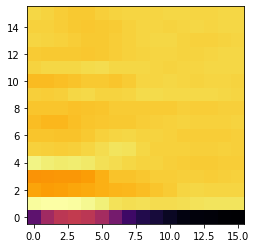

In [44]:
# TEST: Test shorter MFCC

from playsound import playsound

idx = 13

# Create path from given filename and target item
path = join(dataset_path, target_list[int(y_orig_train[idx])],filenames_train[idx])

# Create MFCCs
mfccs = calc_mfcc(path)
print("MFCCs: ", mfccs)

# Plot MFCC
fig = plt.figure()
plt.imshow(mfccs, cmap = 'inferno', origin ='lower')

# TEST: Play problem sounds
print(target_list[int(y_orig_train[idx])])
playsound(path)

In [45]:
# Function: Create MFCCs, keeping only ones of desired length i.e. 16 sets of coefficients

def extract_features(in_files, in_y):
    prob_cnt = 0
    out_x = []
    out_y = []
    
    for index, filename in enumerate(in_files):
        
        # Create path from given filename and target item
        path = join(dataset_path, target_list[int(in_y[index])],filename)
        
        # Check to make sure we are reading a wav file
        if not path.endswith('.wav'):
            continue
        
        # Create MFCCs
        mfccs = calc_mfcc(path)
        
        # Only keep MFCCs  with given length 
        if mfccs.shape[1] == len_mfcc:
            out_x.append(mfccs)
            out_y.append(in_y[index])
        else:
            print('Dropped: ', index, mfccs.shape)
            prob_cnt += 1
            
    return out_x, out_y, prob_cnt

In [46]:
# Create train, validation, and test sets

x_train, y_train, prob = extract_features(filenames_train, y_orig_train)
print('Removed percentage: ', prob/len(y_orig_train))
x_val, y_val, prob = extract_features(filenames_val, y_orig_val)
print('Removed percentage: ', prob/len(y_orig_val))
x_test, y_test, prob = extract_features(filenames_test, y_orig_test)
print('Removed percentage: ', prob/len(y_orig_test))

Dropped:  10 (16, 11)
Dropped:  22 (16, 15)
Dropped:  34 (16, 9)
Dropped:  68 (16, 15)
Dropped:  70 (16, 7)
Dropped:  72 (16, 14)
Dropped:  93 (16, 12)
Dropped:  124 (16, 11)
Dropped:  141 (16, 15)
Dropped:  194 (16, 13)
Dropped:  197 (16, 12)
Dropped:  217 (16, 13)
Dropped:  224 (16, 10)
Dropped:  231 (16, 15)
Dropped:  257 (16, 10)
Dropped:  262 (16, 12)
Dropped:  269 (16, 15)
Dropped:  270 (16, 11)
Dropped:  273 (16, 8)
Dropped:  282 (16, 10)
Dropped:  295 (16, 9)
Dropped:  303 (16, 12)
Dropped:  310 (16, 10)
Dropped:  311 (16, 14)
Dropped:  317 (16, 12)
Dropped:  331 (16, 13)
Dropped:  363 (16, 15)
Dropped:  383 (16, 12)
Dropped:  386 (16, 12)
Dropped:  421 (16, 14)
Dropped:  430 (16, 15)
Dropped:  439 (16, 1)
Dropped:  454 (16, 11)
Dropped:  461 (16, 12)
Dropped:  520 (16, 14)
Dropped:  525 (16, 12)
Dropped:  550 (16, 7)
Dropped:  553 (16, 15)
Dropped:  560 (16, 13)
Dropped:  582 (16, 11)
Dropped:  583 (16, 12)
Dropped:  593 (16, 15)
Dropped:  614 (16, 8)
Dropped:  626 (16, 12)
Dr

Dropped:  4916 (16, 7)
Dropped:  4925 (16, 11)
Dropped:  4940 (16, 11)
Dropped:  4968 (16, 13)
Dropped:  4994 (16, 12)
Dropped:  5000 (16, 12)
Dropped:  5042 (16, 15)
Dropped:  5047 (16, 11)
Dropped:  5049 (16, 7)
Dropped:  5056 (16, 14)
Dropped:  5063 (16, 9)
Dropped:  5064 (16, 14)
Dropped:  5074 (16, 14)
Dropped:  5091 (16, 13)
Dropped:  5106 (16, 15)
Dropped:  5112 (16, 10)
Dropped:  5124 (16, 10)
Dropped:  5126 (16, 11)
Dropped:  5164 (16, 14)
Dropped:  5165 (16, 11)
Dropped:  5167 (16, 12)
Dropped:  5176 (16, 15)
Dropped:  5178 (16, 14)
Dropped:  5186 (16, 7)
Dropped:  5191 (16, 13)
Dropped:  5210 (16, 15)
Dropped:  5234 (16, 15)
Dropped:  5268 (16, 7)
Dropped:  5270 (16, 11)
Dropped:  5320 (16, 9)
Dropped:  5367 (16, 15)
Dropped:  5380 (16, 15)
Dropped:  5435 (16, 13)
Dropped:  5449 (16, 14)
Dropped:  5456 (16, 12)
Dropped:  5482 (16, 9)
Dropped:  5495 (16, 12)
Dropped:  5501 (16, 14)
Dropped:  5513 (16, 15)
Dropped:  5521 (16, 12)
Dropped:  5525 (16, 13)
Dropped:  5531 (16, 14)

Dropped:  10012 (16, 13)
Dropped:  10030 (16, 11)
Dropped:  10037 (16, 13)
Dropped:  10043 (16, 9)
Dropped:  10096 (16, 14)
Dropped:  10098 (16, 15)
Dropped:  10107 (16, 9)
Dropped:  10114 (16, 11)
Dropped:  10118 (16, 11)
Dropped:  10121 (16, 13)
Dropped:  10122 (16, 15)
Dropped:  10131 (16, 15)
Dropped:  10150 (16, 11)
Dropped:  10168 (16, 14)
Dropped:  10183 (16, 11)
Dropped:  10215 (16, 10)
Dropped:  10249 (16, 11)
Dropped:  10250 (16, 13)
Dropped:  10275 (16, 14)
Dropped:  10309 (16, 15)
Dropped:  10326 (16, 11)
Dropped:  10348 (16, 15)
Dropped:  10352 (16, 12)
Dropped:  10358 (16, 11)
Dropped:  10388 (16, 13)
Dropped:  10413 (16, 14)
Dropped:  10418 (16, 11)
Dropped:  10420 (16, 14)
Dropped:  10426 (16, 13)
Dropped:  10472 (16, 12)
Dropped:  10488 (16, 15)
Dropped:  10501 (16, 11)
Dropped:  10512 (16, 11)
Dropped:  10516 (16, 11)
Dropped:  10544 (16, 13)
Dropped:  10551 (16, 13)
Dropped:  10552 (16, 9)
Dropped:  10602 (16, 12)
Dropped:  10654 (16, 4)
Dropped:  10655 (16, 12)
Drop

Dropped:  14403 (16, 15)
Dropped:  14414 (16, 15)
Dropped:  14425 (16, 14)
Dropped:  14432 (16, 13)
Dropped:  14445 (16, 13)
Dropped:  14449 (16, 13)
Dropped:  14450 (16, 9)
Dropped:  14466 (16, 8)
Dropped:  14480 (16, 11)
Dropped:  14486 (16, 14)
Dropped:  14501 (16, 13)
Dropped:  14534 (16, 13)
Dropped:  14536 (16, 7)
Dropped:  14555 (16, 10)
Dropped:  14557 (16, 10)
Dropped:  14564 (16, 9)
Dropped:  14577 (16, 8)
Dropped:  14592 (16, 7)
Dropped:  14598 (16, 11)
Dropped:  14612 (16, 10)
Dropped:  14618 (16, 14)
Dropped:  14638 (16, 10)
Dropped:  14640 (16, 13)
Dropped:  14658 (16, 15)
Dropped:  14679 (16, 13)
Dropped:  14703 (16, 12)
Dropped:  14726 (16, 13)
Dropped:  14727 (16, 15)
Dropped:  14734 (16, 9)
Dropped:  14769 (16, 14)
Dropped:  14781 (16, 12)
Dropped:  14785 (16, 11)
Dropped:  14791 (16, 15)
Dropped:  14798 (16, 11)
Dropped:  14803 (16, 15)
Dropped:  14808 (16, 12)
Dropped:  14818 (16, 11)
Dropped:  14830 (16, 10)
Dropped:  14833 (16, 14)
Dropped:  14837 (16, 12)
Dropped

Dropped:  823 (16, 12)
Dropped:  824 (16, 15)
Dropped:  845 (16, 14)
Dropped:  877 (16, 11)
Dropped:  901 (16, 7)
Dropped:  916 (16, 10)
Dropped:  939 (16, 13)
Dropped:  953 (16, 13)
Dropped:  965 (16, 13)
Dropped:  992 (16, 14)
Dropped:  1005 (16, 9)
Dropped:  1006 (16, 13)
Dropped:  1007 (16, 8)
Dropped:  1011 (16, 15)
Dropped:  1021 (16, 14)
Dropped:  1065 (16, 11)
Dropped:  1068 (16, 15)
Dropped:  1108 (16, 14)
Dropped:  1109 (16, 10)
Dropped:  1136 (16, 12)
Dropped:  1139 (16, 14)
Dropped:  1211 (16, 12)
Dropped:  1213 (16, 15)
Dropped:  1228 (16, 11)
Dropped:  1273 (16, 8)
Dropped:  1283 (16, 12)
Dropped:  1313 (16, 11)
Dropped:  1316 (16, 10)
Dropped:  1341 (16, 12)
Dropped:  1362 (16, 7)
Dropped:  1375 (16, 13)
Dropped:  1385 (16, 14)
Dropped:  1388 (16, 11)
Dropped:  1394 (16, 13)
Dropped:  1436 (16, 14)
Dropped:  1457 (16, 13)
Dropped:  1477 (16, 11)
Dropped:  1485 (16, 13)
Dropped:  1498 (16, 15)
Dropped:  1520 (16, 13)
Dropped:  1527 (16, 8)
Dropped:  1550 (16, 14)
Dropped:

In [47]:
# Using numpy 'savez' function to store the massive arrays into a npz file
# This will allow us to load our saved features and corresponding labels in a future step when we are ready to do the ---
# --- actual Machine Learning

np.savez(feature_sets_file,
        x_train = x_train,
        y_train = y_train,
        x_val = x_val,
        y_val = y_val,
        x_test = x_test,
        y_test = y_test)

In [48]:
# TEST: Load features

feature_sets = np.load(feature_sets_file)
feature_sets.files

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']

In [49]:
len(feature_sets['x_train'])

16835

In [50]:
print(feature_sets['y_val'])

[4. 6. 5. ... 3. 5. 3.]
